In [15]:
import numpy as np
import scipy as sc
import math
from datetime import timedelta, datetime
from operator import attrgetter
import copy_plottrajectoriesfile as cpt
import matplotlib.animation as animation
import imageio #to make .gif out of multiple .png
import matplotlib.pyplot as plt
import scipy.io as sio #to load matlab file
import xarray as xr
from shapely.geometry import Point, Polygon


In [2]:
file=xr.open_dataset('trajectory_try.nc')

In [154]:
file_time=xr.open_dataset('trajectory_try_diff_time.nc')

In [163]:
file_time['time'][2][-1]

<xarray.DataArray 'time' ()>
array('NaT', dtype='datetime64[ns]')
Attributes:
    long_name:      
    standard_name:  time
    axis:           T

In [159]:
file_time['time'][2]

<xarray.DataArray 'time' (obs: 241)>
array(['2018-01-11T00:00:00.000000000', '2018-01-11T01:00:00.000000000',
       '2018-01-11T02:00:00.000000000', ...,                           'NaT',
                                 'NaT',                           'NaT'],
      dtype='datetime64[ns]')
Dimensions without coordinates: obs
Attributes:
    long_name:      
    standard_name:  time
    axis:           T

In [16]:
mat_boundaries = sio.loadmat('polygons_natacha.mat')

In [47]:
#mat_boundaries['lon_pol4']

In [36]:
coords = [(mat_boundaries['lat_pol4'][0][i],mat_boundaries['lon_pol4'][0][i]) for i in range(0,len(mat_boundaries['lon_pol4'][0]))]

In [18]:
mat = sio.loadmat('polygons_natacha_list.mat')

In [40]:
list_coords=coords[:-1]

In [96]:
type(list_coords[0])


tuple

In [45]:
#(mat['list'][0][:-2])

In [24]:
# Create Point objects
p1 = Point(24.952242, 60.1696017)
p2 = Point(24.976567, 60.1612500)

# Create a Polygon
coords = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]
poly = Polygon(coords)

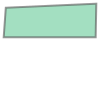

In [25]:
poly

In [41]:
poly = Polygon(list_coords)

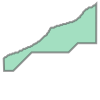

In [42]:
poly

In [43]:
%matplotlib qt

In [54]:
(file['lat'][0][3])

<xarray.DataArray 'lat' ()>
array(-32.98051, dtype=float32)
Attributes:
    long_name:      
    standard_name:  latitude
    units:          degrees_north
    axis:           Y

In [97]:
def Try(i):
    liste=[]
    for j in range(0,len(file['lat'][i])):
        liste.append((file['lat'][i][j],file['lon'][i][j]))
    return liste

coords_particle = []
for i in range(0,len(file['lat'])):
    coords_particle.append(Try(i))

In [152]:
p3, p8 = [], []
for i in range(0,361):
    p3.append(Point(coords_particle[2][i]))
    p8.append(Point(coords_particle[7][i]))

In [153]:
for i in range(0,361):
    if(p8[i].within(poly)):
        print(i)
        break

105


In [150]:
np.any(np.asarray(p3).within(poly))

TypeError: float() argument must be a string or a number, not 'Point'